# Simulation 2_b32 - Analysing


## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as SGfilter
from IPython.display import clear_output, display
import datetime
import joblib
from tqdm import tqdm

import const
import utilities as ut


import gym
import ctfsql
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import DQN
import evaluate as ev

## Defining the parameters of the simulations

In [2]:
n_simulations = 10
n_episodes_training = 10**6
n_episodes_test = 10**2
retest = False
#Not good practice, but allows for when it fails on some machines
#import os
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
env = gym.make('ctfsql-v0')
folder = ""

## Reading the models

In [31]:
dqn_models = []
import glob
for i in range(n_simulations):
    for file in glob.glob(str(i) + "ignore_simul2*.zip"):
        print(folder + file[:-4], end = ":")
        model = DQN.load(folder + file[:-4])
        dqn_models.append(model)
        print(model)


0ignore_simul2_20210218143414869704:<stable_baselines3.dqn.dqn.DQN object at 0x000001F765EA44C0>
1ignore_simul2_20210218160120897065:<stable_baselines3.dqn.dqn.DQN object at 0x000001F766F1AA60>
2ignore_simul2_20210218173538822207:<stable_baselines3.dqn.dqn.DQN object at 0x000001F572F9FF10>
3ignore_simul2_20210218191817721878:<stable_baselines3.dqn.dqn.DQN object at 0x000001F607D2CA60>
4ignore_simul2_20210218204050617401:<stable_baselines3.dqn.dqn.DQN object at 0x000001F50FF3F250>
5ignore_simul2_20210218220406798780:<stable_baselines3.dqn.dqn.DQN object at 0x000001F766F18F40>
6ignore_simul2_20210218232811124508:<stable_baselines3.dqn.dqn.DQN object at 0x000001F6CE4835E0>
7ignore_simul2_20210219005104384978:<stable_baselines3.dqn.dqn.DQN object at 0x000001F766EF29D0>
8ignore_simul2_20210219015549758304:<stable_baselines3.dqn.dqn.DQN object at 0x000001F766EF2EE0>
9ignore_simul2_20210219030134866714:<stable_baselines3.dqn.dqn.DQN object at 0x000001F572FB4E50>


In [5]:
#import evaluate15 as ev2
#for i in range(n_simulations):
#    mean_reward, _, median_reward = ev2.evaluate_model_deterministic(dqn_models[i], env, num_steps=10**5)
#    print('dqn Mean reward: {0} median reward {1}'.format(mean_reward, median_reward))

In [6]:
#import evaluate15 as ev2
#for i in tqdm(range(n_simulations)):
#    mean_reward, _, median_reward = ev2.evaluate_model_nondeter(dqn_models[i], env, num_steps=10**5)
#    print('dqn Mean reward: {0} median reward {1}'.format(mean_reward, median_reward))

In [7]:
import evaluate17 as ev2
#for i in tqdm(range(n_simulations)):
reward = ev2.test_episodes(dqn_models[i], env, num_episodes=100)
num_steps = 10-np.array(reward)

j 0 j 1 j 2 j 3 j 4 j 5 j 6 j 7 j 8 j 9 j 10 j 11 j 12 j 13 j 14 j 15 j 16 j 17 j 18 j 19 j 20 j 21 j 22 j 23 j 24 j 25 j 26 j 27 j 28 j 29 j 30 j 31 j 32 j 33 j 34 j 35 j 36 j 37 j 38 j 39 j 40 j 41 j 42 j 43 j 44 j 45 j 46 j 47 j 48 j 49 j 50 j 51 j 52 j 53 j 54 j 55 j 56 j 57 j 58 j 59 j 60 j 61 j 62 j 63 j 64 j 65 j 66 j 67 j 68 j 69 j 70 j 71 j 72 j 73 j 74 j 75 j 76 j 77 j 78 j 79 j 80 j 81 j 82 j 83 j 84 j 85 j 86 j 87 j 88 j 89 j 90 j 91 j 92 j 93 j 94 j 95 j 96 j 97 j 98 j 99 

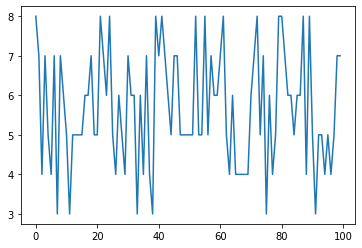

In [8]:
plt.plot(reward)

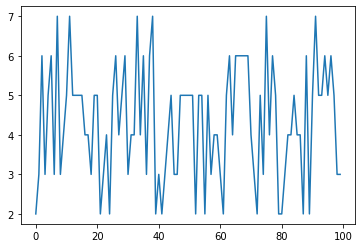

In [9]:
plt.plot(num_steps)

In [10]:
if(retest):
    rewards = []
    num_steps = []
    for i in tqdm(range(n_simulations)):
        rewards.append(ev2.test_episodes(dqn_models[i], env, num_episodes=1000))
        reward = rewards[-1]
        num_steps.append(10-np.array(reward) + 1)
    num_steps = np.array(num_steps)

In [11]:
if(retest):
    timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S%f")
    np.savetxt("ignore_simulation2_1_num_steps"+timestamp+".csv", num_steps)
    np.savetxt("ignore_simulation2_1_num_steps.csv", num_steps)
else:
    num_steps = np.loadtxt("ignore_simulation2_1_num_steps.csv")

214.3773 6.0


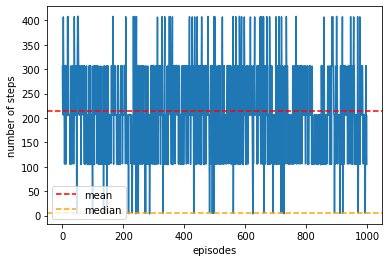

In [12]:
#plt.errorbar(range(n_episodes_test),np.mean(num_steps,axis=0),yerr=np.std(num_steps,axis=0))
plt.plot(range(n_episodes_test*10),np.mean(num_steps,axis=0))
plt.xlabel('episodes')
plt.ylabel('number of steps')
plt.axhline(np.mean(num_steps),c='red',ls='--',label='mean')
plt.axhline(np.median(num_steps),c='orange',ls='--',label='median')
print(np.mean(num_steps), np.median(num_steps))
plt.legend()
num_steps = np.array(num_steps)
plt.savefig("figures/sim2_1_test1.png")

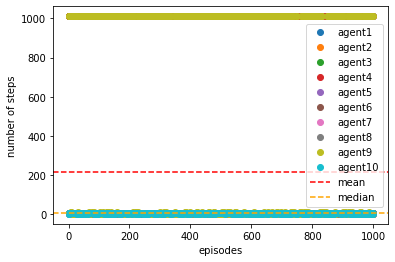

In [13]:
#plt.errorbar(range(n_episodes_test),np.mean(num_steps,axis=0),yerr=np.std(num_steps,axis=0))
for i in range(n_simulations):
    plt.plot(range(n_episodes_test*10),num_steps[i,:], "o", label = "agent"+str(i+1))
plt.xlabel('episodes')
plt.ylabel('number of steps')
plt.axhline(np.mean(num_steps),c='red',ls='--',label='mean')
plt.axhline(np.median(num_steps),c='orange',ls='--',label='median')
plt.legend()
num_steps = np.array(num_steps)
plt.savefig("figures/sim2_1_test2.png")

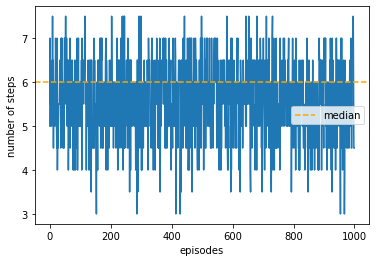

In [14]:
#plt.errorbar(range(n_episodes_test),np.mean(num_steps,axis=0),yerr=np.std(num_steps,axis=0))
plt.plot(range(n_episodes_test*10),np.median(num_steps,axis=0))
plt.xlabel('episodes')
plt.ylabel('number of steps')
plt.axhline(np.median(num_steps),c='orange',ls='--',label='median')
plt.legend()

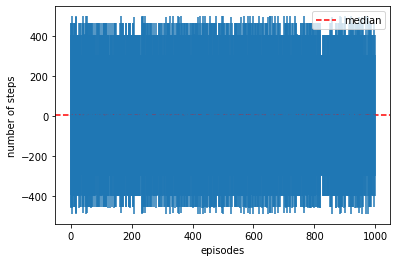

In [15]:
plt.errorbar(range(n_episodes_test*10),np.median(num_steps,axis=0),yerr=np.std(num_steps,axis=0))
#plt.plot(range(n_episodes_test*10),np.median(num_steps,axis=0))
plt.xlabel('episodes')
plt.ylabel('number of steps')
plt.axhline(np.median(num_steps),c='red',ls='--',label='median')
plt.legend()

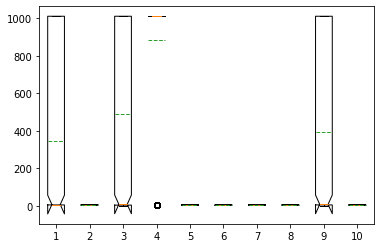

In [16]:
plt.boxplot(num_steps.T, notch = True, showmeans = True, meanline = True)
plt.savefig("figures/sim2_1_notch_test3.png")

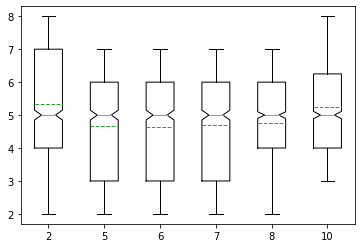

In [17]:
good = np.array([1,4,5,6,7,9])
plt.boxplot(num_steps[good,:].T, notch=True, labels = (good+1), showmeans = True, meanline = True)#, meanprops = dict(color="red"))
plt.savefig("figures/sim2_1_notch_test4.png")

4.894833333333334 5.0


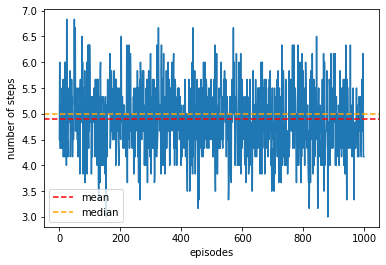

In [18]:
good_steps = num_steps[good,:]
plt.plot(range(n_episodes_test*10),np.mean(good_steps,axis=0))
plt.xlabel('episodes')
plt.ylabel('number of steps')
plt.axhline(np.mean(good_steps),c='red',ls='--',label='mean')
plt.axhline(np.median(good_steps),c='orange',ls='--',label='median')
print(np.mean(good_steps), np.median(good_steps))
plt.legend()
plt.savefig("figures/sim2_1_test5.png")

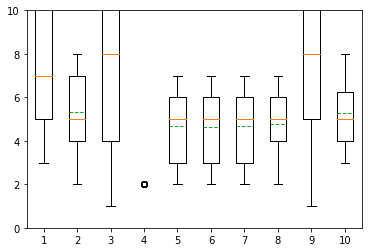

In [30]:
plt.boxplot(num_steps.T, notch=False, showmeans = True, meanline = True)
plt.ylim([0,10])
plt.savefig("figures/sim2_1_notch_test6.png")